In [1]:
import tensorflow as tf
import keras
import pandas
import sklearn
import matplotlib


In [2]:
import pandas as pd
df = pd.read_csv('housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [3]:
dataset = df.values
x = dataset[:,0:10]
y = dataset[:,10]

In [4]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)

In [5]:
x_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(x_scale, y, test_size=0.3)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=0.5)
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [10]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(x_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(x_val, y_val))

Epoch 1/100
32/32 [==============================] - 1s 14ms/step - loss: 0.6962 - accuracy: 0.3855 - val_loss: 0.6935 - val_accuracy: 0.4247
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.5372 - val_loss: 0.6873 - val_accuracy: 0.5205
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6822 - accuracy: 0.5832 - val_loss: 0.6827 - val_accuracy: 0.5525
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6776 - accuracy: 0.5920 - val_loss: 0.6793 - val_accuracy: 0.5890
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6739 - accuracy: 0.6252 - val_loss: 0.6763 - val_accuracy: 0.6210
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6705 - accuracy: 0.6536 - val_loss: 0.6733 - val_accuracy: 0.6073
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6671 - accuracy: 0.6507 - val_loss: 0.6703 - val_accuracy: 0.6119
Epoch 8/100


In [11]:
model.evaluate(x_test, y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2831 - accuracy: 0.8995


0.8995434045791626

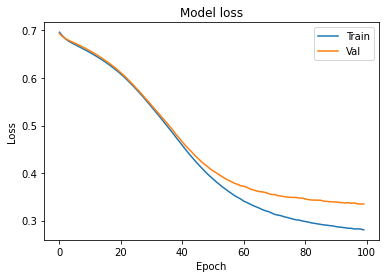

In [12]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()